<a href="https://colab.research.google.com/github/Usanzimfura/Danny-Portofolio/blob/main/Employee_Attrition_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#### Installing kaleido to help display the plotly images on github
!pip install -U kaleido

#**Case Study - Employee Attrition Prediction**

**Context**

McCurr Health Consultancy is an MNC that has thousands of employees spread across the globe. The company believes in hiring the best talent available and retaining them for as long as possible. A huge amount of resources is spent on retaining existing employees through various initiatives. The Head of People Operations wants to bring down the cost of retaining employees. For this, he proposes limiting the incentives to only those employees who are at risk of attrition. As a recently hired Data Scientist in the People Operations Department, you have been asked to identify patterns in characteristics of employees who leave the organization. Also, you have to use this information to predict if an employee is at risk of attrition. This information will be used to target them with incentives.

**Objective**



*  To identify the different factors that drive attrition
*  To build a model to predict if an employee will attrite or not



**Dataset Description**

The data contains information on employees' demographic details, work-related metrics, and attrition flag.

* EmployeeNumber - Unique Employee Identifier
* Attrition - Did the employee attrite or not?
* Age - Age of the employee
* BusinessTravel - Travel commitments for the job
* DailyRate - Data description not available
* Department - Employee's Department
* DistanceFromHome - Distance from work to home (in KM)
* Education - Employee's Education. 1-Below College, 2-College, 3-Bachelor, 4-Master, 5-Doctor
* EducationField - Field of Education
* EnvironmentSatisfaction - 1-Low, 2-Medium, 3-High, 4-Very High
* Gender - Employee's gender
* HourlyRate - Data description not available
* JobInvolvement - 1-Low, 2-Medium, 3-High, 4-Very High
* JobLevel - Level of job (1 to 5)
* JobRole - Job Roles
* JobSatisfaction - 1-Low, 2-Medium, 3-High, 4-Very High
* MaritalStatus - Marital Status
* MonthlyIncome - Monthly Salary
* MonthlyRate - Data description not available
* NumCompaniesWorked - Number of companies worked at
* Over18 - Whether the employee is over 18 years of age?
* OverTime - Whether the employee is doing overtime?
* PercentSalaryHike - The percentage increase in the salary last year
* PerformanceRating - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* RelationshipSatisfaction - 1-Low, 2-Medium, 3-High, 4-Very High
* StandardHours - Standard Hours
* StockOptionLevel - Stock Option Level
* TotalWorkingYears - Total years worked
* TrainingTimesLastYear - Number of training attended last year
* WorkLifeBalance - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* YearsAtCompany - Years at Company
* YearsInCurrentRole - Years in the current role
* YearsSinceLastPromotion - Years since the last promotion
* YearsWithCurrManager - Years with the current manager

In the real world, you will not find definitions for some of your variables. It is the part of the analysis to figure out what they might mean.

**IMPORTING NEEDED LIBRARIES**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

######To scale the data using z-score ########
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split


######## Algorithms to use #############
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestClassifier

########Metrics to evaluate the model ########
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score
from sklearn import tree

######## For tuning the model###########
from sklearn.model_selection import GridSearchCV

############To ignore warnings ############
import warnings
warnings.filterwarnings("ignore")


In [7]:
###### mounting my google drive ###########
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
########## Loading my dataset
data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Classification/Employee_Attrition/HR_Employee_Attrition_Dataset.xlsx")

In [9]:
###### displaying first rows in from our dataset
data.head()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,...,1,80,0,8,0,1,6,4,0,5
1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,...,4,80,1,10,3,3,10,7,1,7
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,2,80,0,7,3,3,0,0,0,0
3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,...,3,80,0,8,3,3,8,7,3,0
4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeNumber            2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   Age                       2940 non-null   int64 
 3   BusinessTravel            2940 non-null   object
 4   DailyRate                 2940 non-null   int64 
 5   Department                2940 non-null   object
 6   DistanceFromHome          2940 non-null   int64 
 7   Education                 2940 non-null   int64 
 8   EducationField            2940 non-null   object
 9   EnvironmentSatisfaction   2940 non-null   int64 
 10  Gender                    2940 non-null   object
 11  HourlyRate                2940 non-null   int64 
 12  JobInvolvement            2940 non-null   int64 
 13  JobLevel                  2940 non-null   int64 
 14  JobRole                 


Observation:
*   Our dataset has 2940 rows and 34 columns




In [11]:
##############To check for unique values
data.nunique()

,0
EmployeeNumber,2940
Attrition,2
Age,43
BusinessTravel,3
DailyRate,886
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EnvironmentSatisfaction,4


In [12]:
# Checking for duplicate values in the data
data.duplicated().sum()

0

In [13]:
######## TO COUNT THE NUMBER OF DUPLICATES
data['EmployeeNumber'].value_counts()

,count
EmployeeNumber,
1,1
1954,1
1956,1
1957,1
1958,1
...,...
982,1
983,1
984,1


In [14]:
# Dropping employee number from the data as it is an identifier and will not add value to the analysis
data=data.drop(columns=["EmployeeNumber"])

In [15]:
########### KEEPING NUMERICAL AND CATEGORICAL COLUMNS #########33
num_cols = data.select_dtypes(include=['number']).columns.tolist()
cat_cols=data.select_dtypes(exclude=['number']).columns.tolist()

In [16]:
cat_cols

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [17]:
###### displaying numerical content from our dataset############3
data[num_cols].head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,4,80,1,6,3,3,2,2,2,2


In [18]:
data[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       2940 non-null   int64
 1   DailyRate                 2940 non-null   int64
 2   DistanceFromHome          2940 non-null   int64
 3   Education                 2940 non-null   int64
 4   EnvironmentSatisfaction   2940 non-null   int64
 5   HourlyRate                2940 non-null   int64
 6   JobInvolvement            2940 non-null   int64
 7   JobLevel                  2940 non-null   int64
 8   JobSatisfaction           2940 non-null   int64
 9   MonthlyIncome             2940 non-null   int64
 10  MonthlyRate               2940 non-null   int64
 11  NumCompaniesWorked        2940 non-null   int64
 12  PercentSalaryHike         2940 non-null   int64
 13  PerformanceRating         2940 non-null   int64
 14  RelationshipSatisfaction  2940 non-null 

In [19]:
######## describing or giving a summary our numerical dataset
data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2940.0,36.923810,9.133819,18.0,30.0,36.0,43.0,60.0
DailyRate,2940.0,802.485714,403.440447,102.0,465.0,802.0,1157.0,1499.0
DistanceFromHome,2940.0,9.192517,8.105485,1.0,2.0,7.0,14.0,29.0
Education,2940.0,2.912925,1.023991,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,2940.0,2.721769,1.092896,1.0,2.0,3.0,4.0,4.0
HourlyRate,2940.0,65.891156,20.325969,30.0,48.0,66.0,84.0,100.0
JobInvolvement,2940.0,2.729932,0.711440,1.0,2.0,3.0,3.0,4.0
JobLevel,2940.0,2.063946,1.106752,1.0,1.0,2.0,3.0,5.0
JobSatisfaction,2940.0,2.728571,1.102658,1.0,2.0,3.0,4.0,4.0
MonthlyIncome,2940.0,6502.931293,4707.155770,1009.0,2911.0,4919.0,8380.0,19999.0


In our dataset, we can observe the followings:

 * The average age of employees is 36. The age range from 18 to 60
 * The job satisfaction ranges from 1.0 to 4.0 with the average of 2.70
 * The average montthly income is 6502USD.The minimum of the average is 1009 while the maximum is 19999USD
 * Average percentage of Salary hike is 15%.  The minimum is 11% to 25% as the maximum.




In [20]:
data[cat_cols].head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


## **EXPLORATORY DATA ANALYSIS**

### **Univariate analysis**

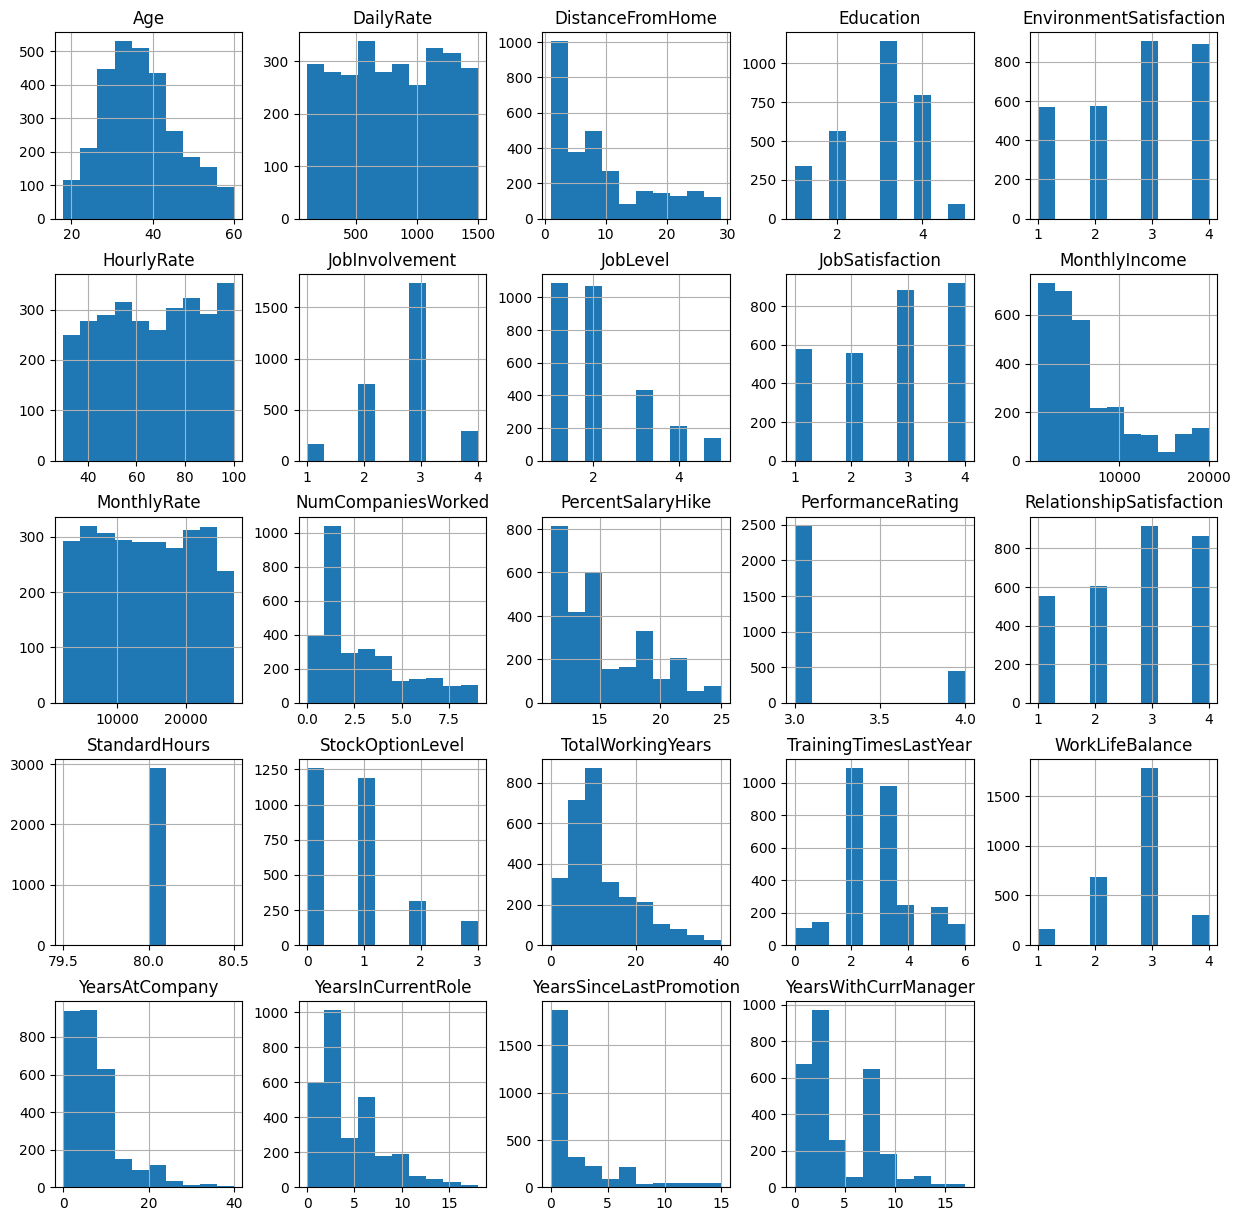

In [21]:
data[num_cols].hist(figsize=(15,15))
plt.show()

**Observations**

* The majority of employees's age is between 25 to 55 years
* The majority of employees live not far than 10 km away from the work place
* The majority of employees rate their job satisfaction as good which lies between 3 and 4 even though there many others who are not satisfied.
* A big number employees worked for less than 3 companies although there some employees who worked to more 7 companies


**Univariate analysis for categorical variables**

In [22]:
#### Printing the number of occurrences of each unique value in each categorical column
for i in cat_cols:
  print(data[i].value_counts(1))
  print("-"*50)

Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64
--------------------------------------------------
BusinessTravel
Travel_Rarely        0.709524
Travel_Frequently    0.188435
Non-Travel           0.102041
Name: proportion, dtype: float64
--------------------------------------------------
Department
Research & Development    0.653741
Sales                     0.303401
Human Resources           0.042857
Name: proportion, dtype: float64
--------------------------------------------------
EducationField
Life Sciences       0.412245
Medical             0.315646
Marketing           0.108163
Technical Degree    0.089796
Other               0.055782
Human Resources     0.018367
Name: proportion, dtype: float64
--------------------------------------------------
Gender
Male      0.6
Female    0.4
Name: proportion, dtype: float64
--------------------------------------------------
JobRole
Sales Executive              0.221769
Research Scientist           0.198639
Laborator

##**Bivariate and multivariate Analysis**
We have analyzed different categorical and numerical variables. Let's now check how does attrition rate is related with other categorical variables.

In [23]:
data.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,80,1,6,3,3,2,2,2,2


**Let's Check for attrition by department**

In [24]:
######### checking for attrition by department
data.groupby(['Department'])['Attrition'].value_counts()

Department              Attrition
Human Resources         No            102
                        Yes            24
Research & Development  No           1656
                        Yes           266
Sales                   No            708
                        Yes           184
Name: count, dtype: int64

In [25]:
attrition_yes_data=data[data['Attrition']=='Yes']
attrition_yes_data.groupby(['Department'])['Attrition'].value_counts()

,,count
Department,Attrition,
Human Resources,Yes,24
Research & Development,Yes,266
Sales,Yes,184


In [26]:
data.groupby(['BusinessTravel'])['Attrition'].value_counts()

BusinessTravel     Attrition
Non-Travel         No            276
                   Yes            24
Travel_Frequently  No            416
                   Yes           138
Travel_Rarely      No           1774
                   Yes           312
Name: count, dtype: int64

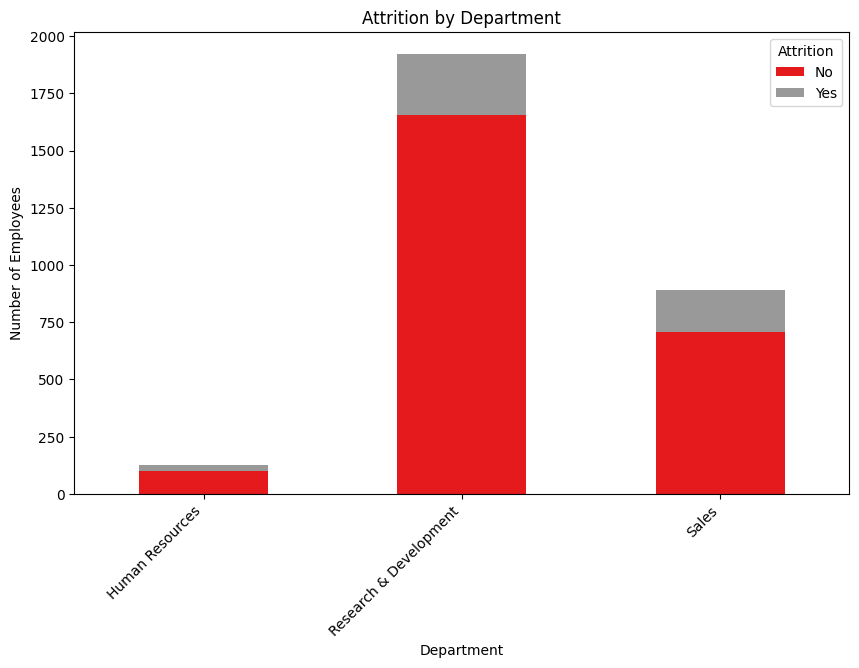

In [27]:
# Group the data by Department and Attrition, and count the occurrences
attrition_by_department = data.groupby(['Department', 'Attrition']).size().unstack().fillna(0)

# Create a stacked bar plot
ax = attrition_by_department.plot(kind='bar', stacked=True, figsize=(10, 6), cmap='Set1')

# Customize the plot
plt.title('Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.legend(title='Attrition', labels=['No', 'Yes'])

# Show the plot
plt.show()

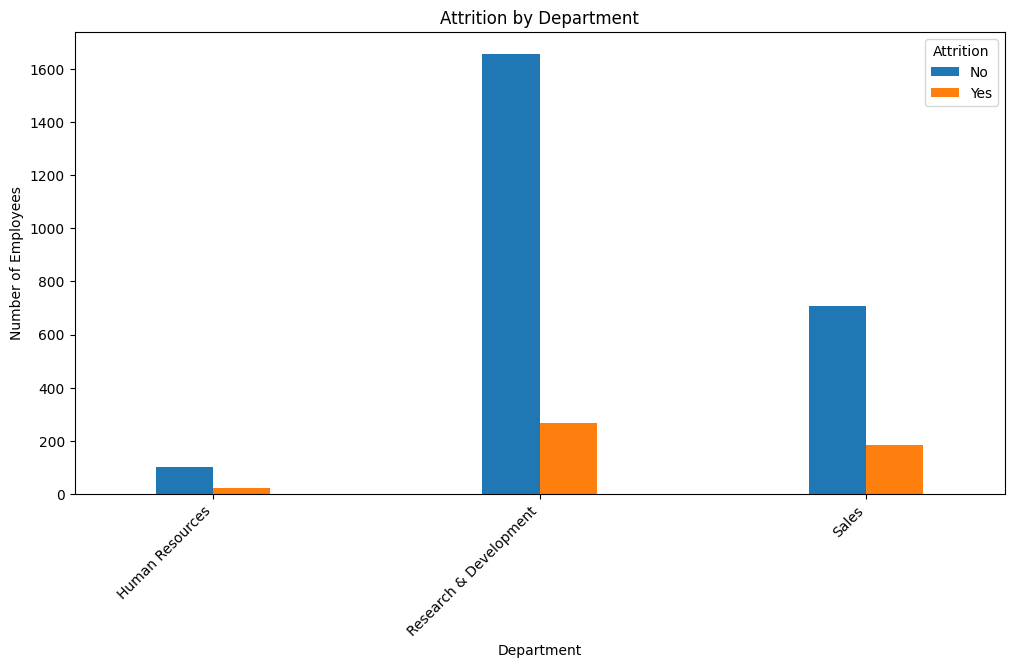

In [28]:
# Group the data by Department and Attrition and count the occurrences
attrition_by_department = data.groupby(['Department', 'Attrition']).size().unstack().fillna(0)

# Create a side-by-side (grouped) bar plot
ax = attrition_by_department.plot(kind='bar', figsize=(12, 6), width=0.35)

# Customize the plot
plt.title('Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(np.arange(len(attrition_by_department.index)), attrition_by_department.index, rotation=45, ha="right")
plt.legend(title='Attrition', labels=['No', 'Yes'])

# Show the plot
plt.show()
## In this code, we've adjusted the width parameter in the plot function to create side-by-side bars for 'No' and 'Yes' Attrition within each department. The np.arange(len(attrition_by_department.index)) is used to position the bars for each department on the x-axis. You can further customize the plot's appearance and labels according to your preferences.







In [29]:
data.groupby(['Department'])['Attrition'].size()

,Attrition
Department,
Human Resources,126
Research & Development,1922
Sales,892


In [30]:
########## Retaining the attrition number by Department #########
hr,rd,sl=(data.groupby(['Department'])['Attrition'].size()).tolist()
hr_y,rd_y,sl_y=(data[data['Attrition'] == 'Yes'].groupby('Department').size()).tolist()
hr_n,rd_n,sl_n=(data[data['Attrition'] == 'No'].groupby('Department').size()).tolist()

In [31]:
attrition_count=data[data['Attrition'] == 'Yes'].groupby('Department').size()
attrition_count.tolist()



[24, 266, 184]

In [32]:
data.groupby(['Department'])['Attrition'].value_counts(2,)

Department              Attrition
Human Resources         No           0.809524
                        Yes          0.190476
Research & Development  No           0.861602
                        Yes          0.138398
Sales                   No           0.793722
                        Yes          0.206278
Name: proportion, dtype: float64

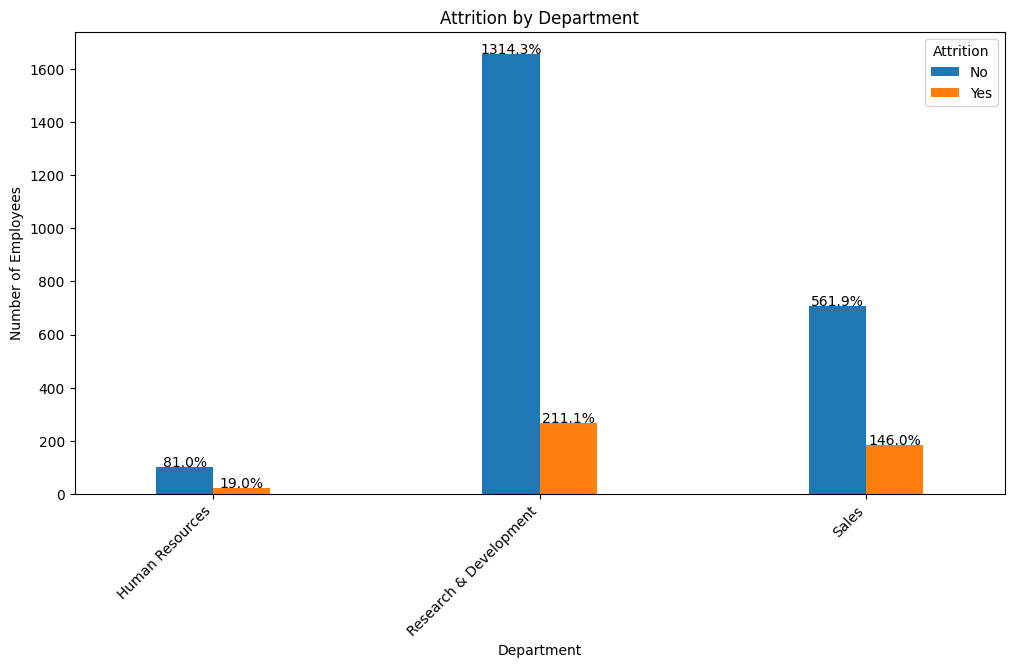

In [33]:
# Group the data by Department and Attrition and count the occurrences
attrition_by_department = data.groupby(['Department', 'Attrition']).size().unstack().fillna(0)

# Create a side-by-side (grouped) bar plot
ax = attrition_by_department.plot(kind='bar', figsize=(12, 6), width=0.35)

# Customize the plot
plt.title('Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(np.arange(len(attrition_by_department.index)), attrition_by_department.index, rotation=45, ha="right")
plt.legend(title='Attrition', labels=['No', 'Yes'])

# Calculate and annotate percentages on the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    percentage = height / attrition_by_department.sum(axis=1)[y] * 100
    #percentage=(hr_y*100)/hr
    ax.annotate(f'{percentage:.1f}%', (x + width/2, y + height + 1), ha='center')

# Show the plot
plt.show()


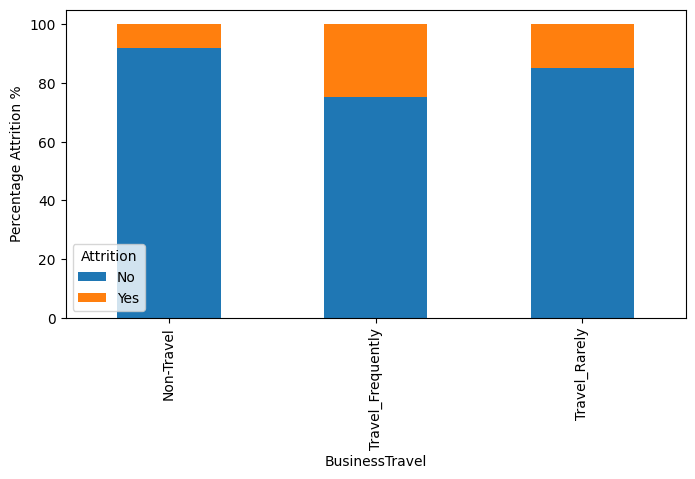

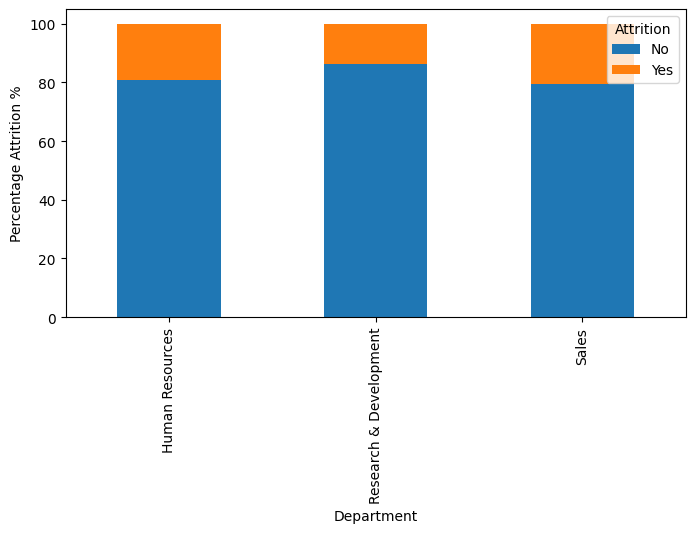

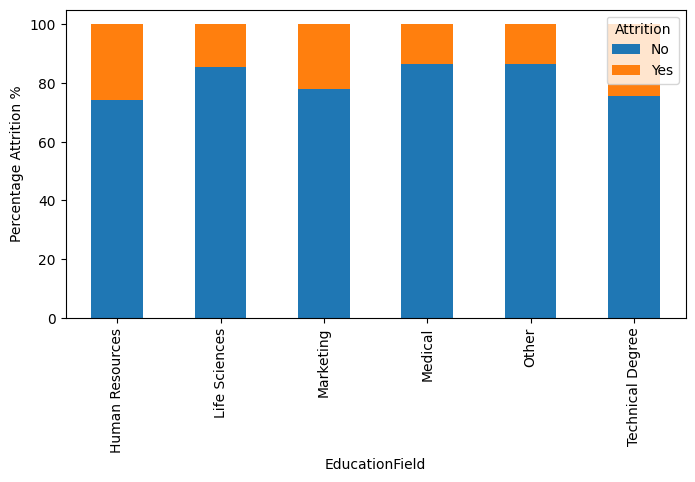

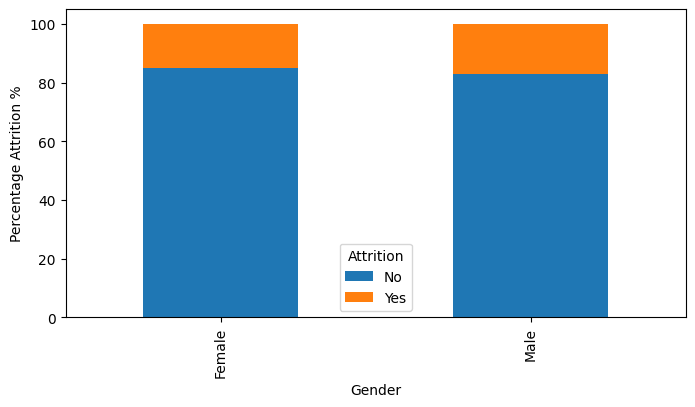

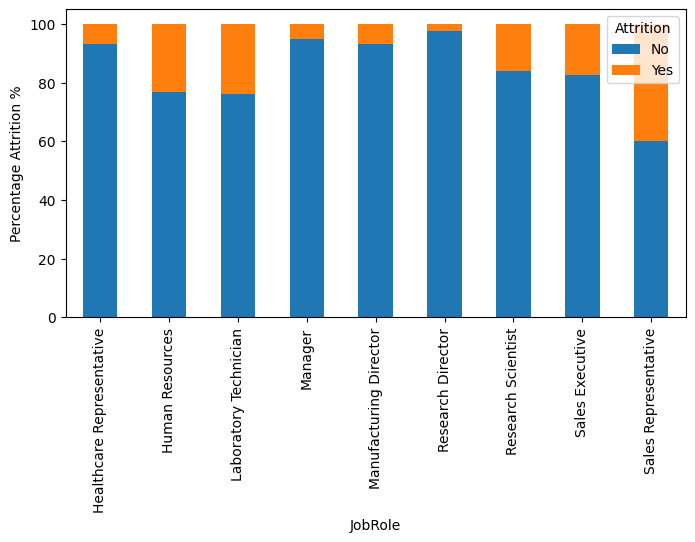

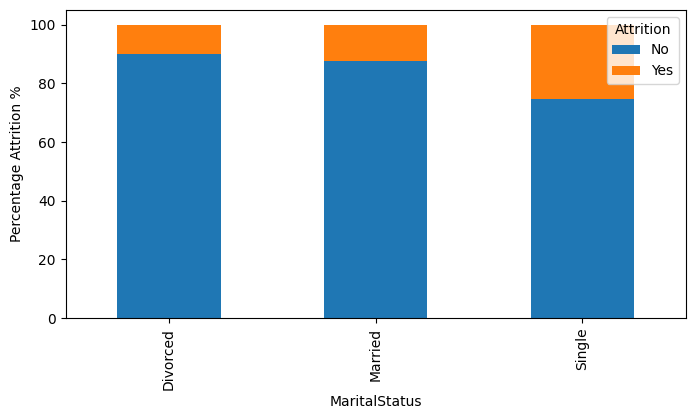

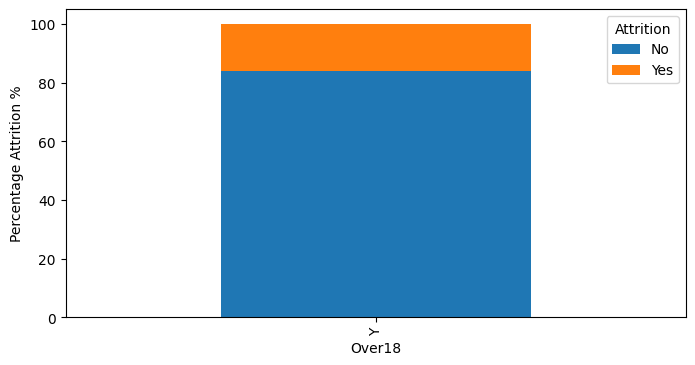

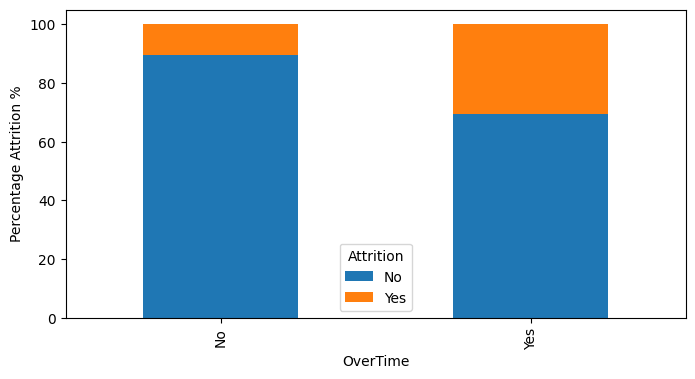

In [34]:
for i in cat_cols:
    if i!='Attrition':
        (pd.crosstab(data[i],data['Attrition'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
        plt.ylabel('Percentage Attrition %')

**Observation**


*   List item
*   List item



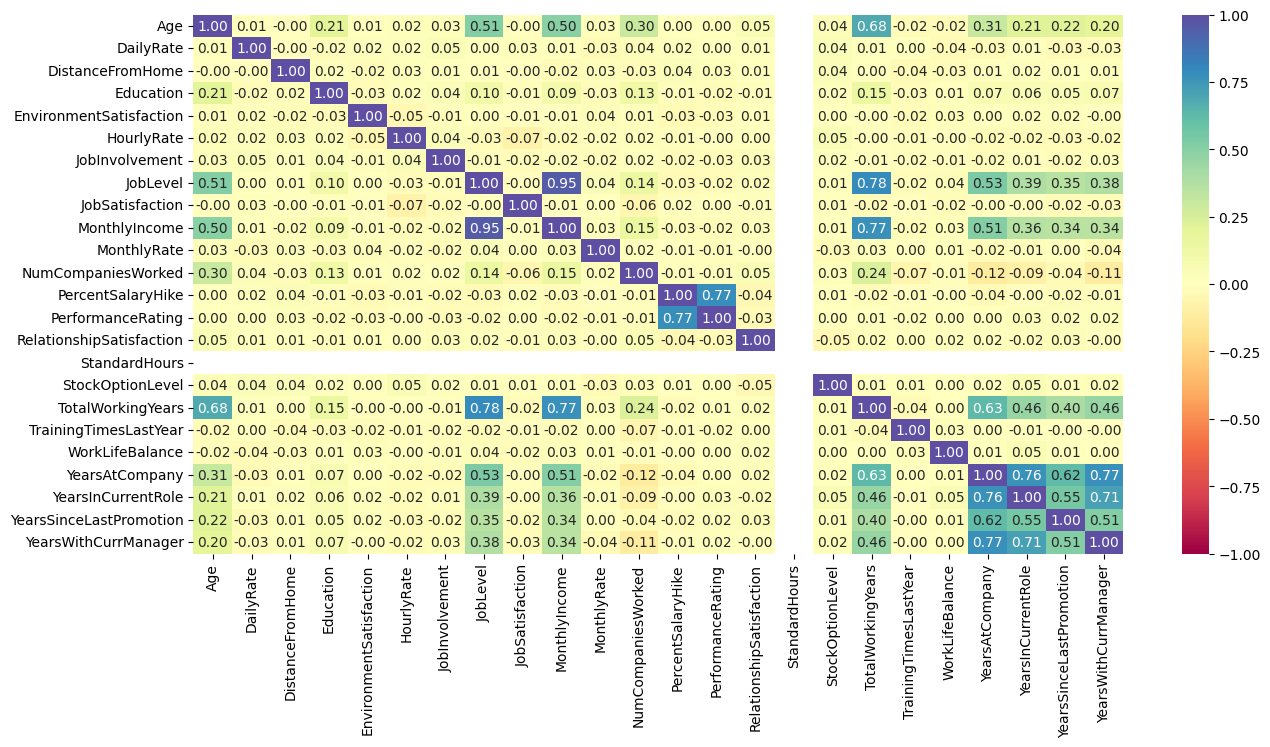

In [35]:
##### LET'S CHECK FOR THE CORRELATION #########
# Plot the heatmap
##col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(data[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observation**

In [36]:
########## Average of attition by Numerical Colums#########
data.groupby(['Attrition'])[num_cols].mean()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
No,37.561233,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,...,2.733982,80.0,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
Yes,33.607595,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,...,2.599156,80.0,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


In [37]:
data.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,80,1,6,3,3,2,2,2,2


##**Model Building - Approach**


1. Data preparation.
2. Partition the data into a train and test set.
3. Build a model on the train data.
4. Tune the model if required.
5. Test the data on the test set.



**Data Preparation **
Let's start by creating dummies for Categorical variables


In [38]:
cat_cols

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [39]:
# Creating list of dummy columns
to_get_dummies_for = ['BusinessTravel', 'Department','Education', 'EducationField','EnvironmentSatisfaction', 'Gender',  'JobInvolvement','JobLevel', 'JobRole', 'MaritalStatus' ]

# Creating dummy variables
df = pd.get_dummies(data = data, columns = to_get_dummies_for, drop_first = True)

# Mapping overtime and attrition
dict_OverTime = {'Yes': 1, 'No':0}
dict_attrition = {'Yes': 1, 'No': 0}

df['OverTime'] = df.OverTime.map(dict_OverTime)
df['Attrition'] = df.Attrition.map(dict_attrition)


In [40]:
X= df.drop(columns = ['Attrition'])

In [41]:
# Separating target variable and other variables
Y=df.Attrition
X= X.drop(columns = ['Over18'])

X.shape

(2940, 55)

In [42]:
X.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1102,1,94,4,5993,19479,8,1,11,...,False,False,False,False,False,False,True,False,False,True
1,49,279,8,61,2,5130,24907,1,0,23,...,False,False,False,False,False,True,False,False,True,False
2,37,1373,2,92,3,2090,2396,6,1,15,...,False,True,False,False,False,False,False,False,False,True
3,33,1392,3,56,3,2909,23159,1,1,11,...,False,False,False,False,False,True,False,False,True,False
4,27,591,2,40,2,3468,16632,9,0,12,...,False,True,False,False,False,False,False,False,True,False


**Separating the independent variables (X) and the dependent variable (Y)**

**Splitting the data into 70% train and 30% test set**

Some classification problems can exhibit a large imbalance in the distribution of the target classes: for instance there could be several times more negative samples than positive samples. In such cases it is recommended to use the stratified sampling technique to ensure that relative class frequencies are approximately preserved in each train and validation fold.

In [43]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

**Scaling our Data**

Tree based models such as Decision Trees and Random Forest does not require feature scaling to be performed as they are not sensitive to the variance in the data.

We will scale the data for Logistic Regression and SVM. We will use the Standard Scaler method, which centers and scales the dataset using the Z-Score. It standardizes features by subtracting the mean and scaling it to have unit variance. The standard score of sample x is calculated as:
* z = (x - u) / s


In [44]:
# Scaling the data
sc=StandardScaler()

# Fit_transform on train data
X_train_scaled=sc.fit_transform(X_train)
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)


X_test_scaled=sc.fit_transform(X_test)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)


In [45]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2058 entries, 1189 to 2736
Data columns (total 55 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                2058 non-null   int64
 1   DailyRate                          2058 non-null   int64
 2   DistanceFromHome                   2058 non-null   int64
 3   HourlyRate                         2058 non-null   int64
 4   JobSatisfaction                    2058 non-null   int64
 5   MonthlyIncome                      2058 non-null   int64
 6   MonthlyRate                        2058 non-null   int64
 7   NumCompaniesWorked                 2058 non-null   int64
 8   OverTime                           2058 non-null   int64
 9   PercentSalaryHike                  2058 non-null   int64
 10  PerformanceRating                  2058 non-null   int64
 11  RelationshipSatisfaction           2058 non-null   int64
 12  StandardHours         

**Model evaluation criterion**

The model can make two types of wrong predictions:

1. Predicting an employee will attrite when the employee doesn't attrite
2. Predicting an employee will not attrite when the employee actually attrites

Which case is more important?


*   **Predicting that the employee will not attrite but the employee attrites**, i.e., losing out on a valuable employee or asset. This would be considered a major miss for any employee attrition predictor and hence the more important case of wrong predictions.

How to reduce this loss i.e the need to reduce False Negatives?

* **The company would want the Recall to be maximized, the greater the Recall**, the higher the chances of minimizing false negatives. Hence, the focus should be on increasing the Recall (minimizing the false negatives) or, in other words, identifying the true positives (i.e. Class 1) very well, so that the company can provide incentives to control the attrition rate especially, for top-performers. This would help in optimizing the overall project cost towards retaining the best talent.

Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.



In [46]:
# Creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Attrite', 'Attrite'], yticklabels=['Not Attrite', 'Attrite'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

###**Building the model**
**We will be building 4 different models:**

* Logistic Regression
* Support Vector Machine(SVM)
* Decision Tree
* Random Forest


**Logistic Regression Model**

Logistic Regression is a supervised learning algorithm which is used for binary classification problems i.e. where the dependent variable is categorical and has only two possible values. In logistic regression, we use the sigmoid function to calculate the probability of an event y, given some features x as:

P(y)=1/exp(1 + exp(-x))

In [47]:
# Fitting logistic regression model

lg=LogisticRegression()
lg.fit(X_train_scaled,y_train)


LogisticRegression()

**Let's check the model performance**

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       740
           1       0.75      0.48      0.58       142

    accuracy                           0.89       882
   macro avg       0.83      0.72      0.76       882
weighted avg       0.88      0.89      0.88       882



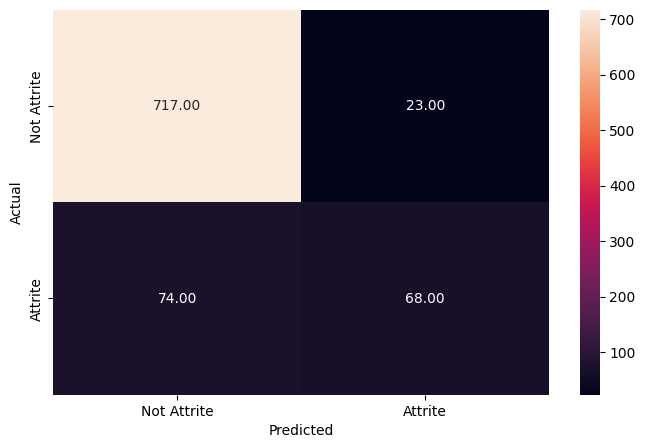

In [48]:
# Checking the performance on the test dataset

y_pred_test = lg.predict(X_test_scaled)

metrics_score(y_test, y_pred_test)

Observations:

We are getting an accuracy of around 90% on train and test dataset.
However, the recall for this model is only around 50% for class 1 on train and 46% on test.

As the recall is low, this model will not perform well in differentiating out those employees who have a high chance of leaving the company, meaning it will eventually not help in reducing the attrition rate.

As we can see from the Confusion Matrix, this model fails to identify the majority of employees who are at risk of attrition.

In [49]:
# Printing the coefficients of logistic regression
cols=X.columns

coef_lg=lg.coef_

pd.DataFrame(coef_lg,columns=cols).T.sort_values(by = 0,ascending = False)

,0
OverTime,0.959813
BusinessTravel_Travel_Frequently,0.715594
MaritalStatus_Single,0.612941
YearsSinceLastPromotion,0.548358
YearsAtCompany,0.518351
NumCompaniesWorked,0.499555
Department_Research & Development,0.443697
BusinessTravel_Travel_Rarely,0.440205
Department_Sales,0.436376
JobRole_Sales Executive,0.397936


Observations:

Features which positively affect on the attrition rate are:

* OverTime
* BusinessTravel_Travel_Frequently
* Department_Research & Development
* JobRole_Sales Executive
* MaritalStatus_Single
* Department_Sales
* NumCompaniesWorked
* YearsSinceLastPromotion
* JobLevel_5
* BusinessTravel_Travel_Rarely
* DistanceFromHome
* YearsAtCompany
* JobRole_Human Resources
* JobRole_Sales Representative

Features which negatively affect on the attrition rate are:

MonthlyIncome
JobInvolvement_3
JobLevel_2
EnvironmentSatisfaction_4
JobInvolvement_4
JobInvolvement_2
EnvironmentSatisfaction_3
EducationField_Life Sciences
EnvironmentSatisfaction_2
YearsWithCurrManager
JobRole_Research Director
TotalWorkingYears
JobSatisfaction